In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import seaborn as sns
sns.set() #used for default 

# forcastsales of furniture for next year

In [2]:
superstore=pd.read_csv("SuperStore.csv" , sep=",", encoding="cp1252")

In [3]:
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
superstore.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
superstore.shape

(2121, 21)

In [7]:
#statical summary
superstore.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [8]:
print(superstore.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
#Checking the stock
superstore['Order Date'].min(), superstore['Order Date'].max()

('1/1/2017', '9/9/2017')

In [10]:
#remove the columns that we do not need
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
superstore.drop(cols, axis=1, inplace=True)

superstore.sort_values('Order Date')

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940
...,...,...
1524,9/9/2017,66.112
1152,9/9/2017,243.920
251,9/9/2017,17.024
250,9/9/2017,141.372


In [11]:
superstore

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,10/11/2015,957.5775
3,6/9/2014,48.8600
4,6/9/2014,1706.1840
...,...,...
2116,3/19/2015,383.4656
2117,12/5/2016,13.4000
2118,9/6/2015,85.9800
2119,1/21/2014,25.2480


In [12]:
superstore=superstore.groupby("Order Date")['Sales'].sum().reset_index()

superstore['Order Date'] = pd.to_datetime(superstore["Order Date"])
superstore.set_index("Order Date",inplace=True)
superstore.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
superstore.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [14]:
superstore.info

<bound method DataFrame.info of                 Sales
Order Date           
2017-01-01   975.4900
2014-01-10    51.9400
2015-01-10  1018.1040
2016-01-10   104.7700
2014-01-11     9.9400
...               ...
2016-09-08  3374.9816
2017-09-08  1000.2390
2014-09-09   864.0240
2016-09-09    15.0080
2017-09-09   482.5640

[889 rows x 1 columns]>

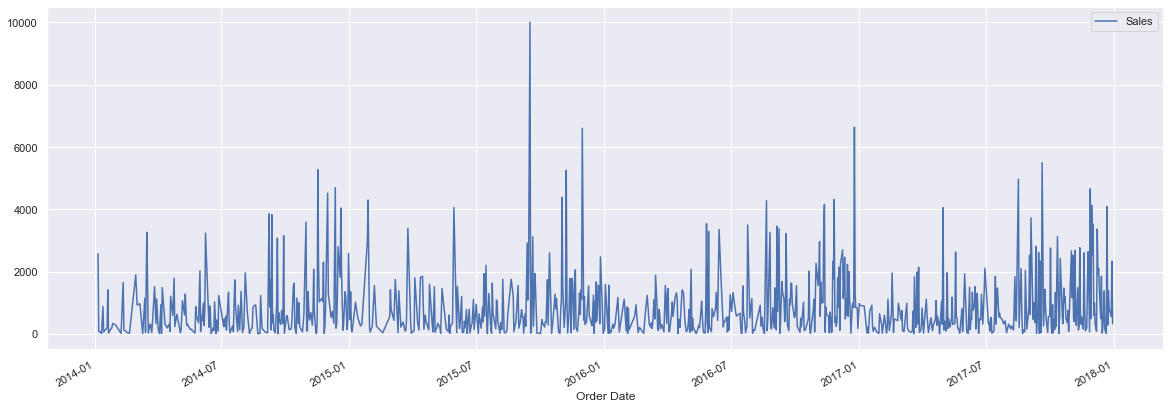

In [15]:
#visualising data
superstore.plot(figsize=(20,7))
plt.show()

In [16]:
#sampling
y=superstore["Sales"].resample('MS').mean()
#frequency of samples

In [17]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

In [18]:
superstore

,Sales
Order Date,
2017-01-01,975.4900
2014-01-10,51.9400
2015-01-10,1018.1040
2016-01-10,104.7700
2014-01-11,9.9400
...,...
2016-09-08,3374.9816
2017-09-08,1000.2390
2014-09-09,864.0240


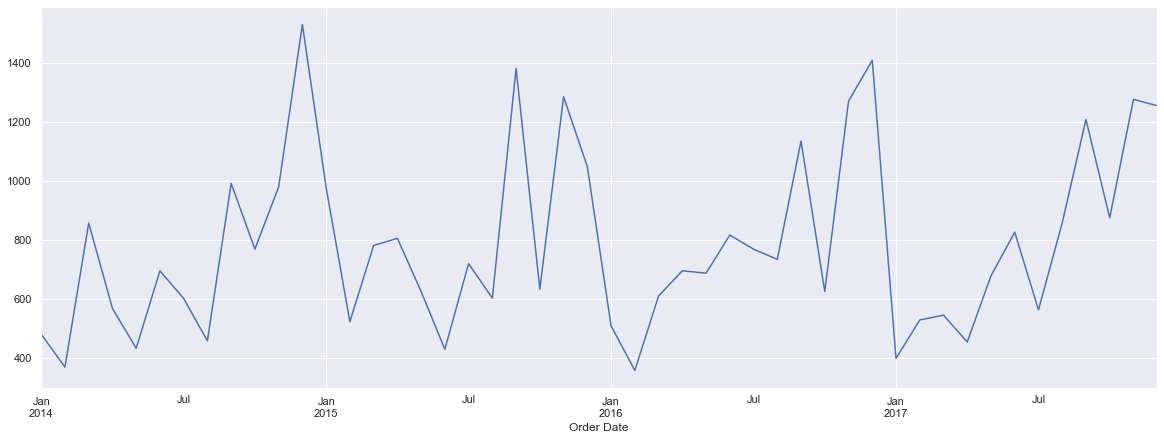

In [31]:
y.plot(figsize=(20,7))
plt.show()

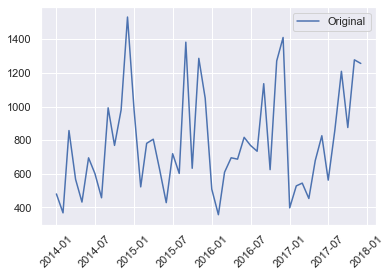

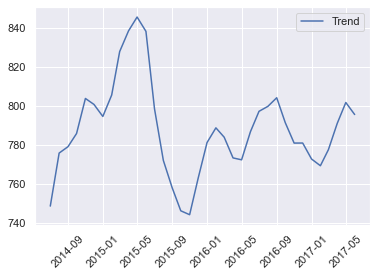

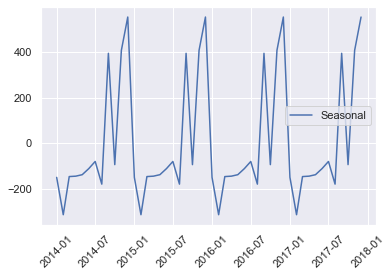

(array([16314., 16436., 16556., 16679., 16801., 16922., 17045., 17167.,
        17287.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

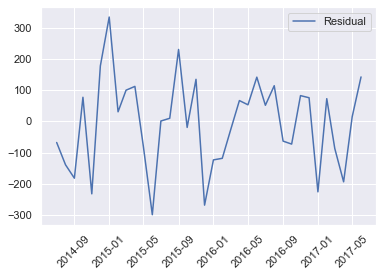

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original') 
plt.xticks(rotation=45)
plt.legend(loc = 'best')


trend = decomposition.trend 
plt.show()
plt.plot(trend, label = 'Trend') 
plt.legend (loc = 'best')
plt.xticks(rotation=45)


seasonal=decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend (loc= 'best')
plt.xticks(rotation=45)


residual= decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend (loc='best')
plt.xticks(rotation=45)


### Conclusion: The plot clearly indicates that the time series has seasonality pattern. The sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

### forcating using ARIMA

In [21]:
#ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q)
#where p,d,q accounts for seasonality, trend and noise in the time series data

In [22]:
p = d = q = range(0, 2)

pdq= list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#12=month
#
print("Examples of parameter combinations for Seasonal ARIMA...")

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
#One of the methods available in Python to model and predict future points of a time series is known as SARIMAX, 
#which stands for Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors.

In [24]:
#To find the optimal set of parameters that yields the best performance for our model
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq: 
        try: 
            mod=sm.tsa.statespace.SARIMAX (y, order=param, 
seasonal_order=param_seasonal, 
enforce_stationarity=False,
enforce_invertibility=False)
            results =mod.fit()
            print('ARIMA{}x{}12 - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC: 769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC: 1477.9768096696878
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC: 477.71701309212006


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC: 302.27028997936577
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC: 497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC: 1454.9978036138832
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC: 318.00471991163414


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC: 304.2488280301536
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC: 720.9252270758111
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC: 2681.7662368166525
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC: 466.5607429809157
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC: 291.62613896732927


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anacon

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC: 499.5881817441688
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC: 2432.4931929562586
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC: 319.9884876946869
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC: 291.8725576435655
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC: 677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC: 1515.5147838934
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC: 486.6378567269463
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC: 304.967122816796
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC: 497.78896630044073


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few obs

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC: 1344.0094401433353
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC: 319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC: 306.91132001514353
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC: 649.9056176816861


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC: 2299.7656150441776
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC: 458.8705548482906
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC: 279.5806233417245
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC: 486.18329774426917


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC: 2403.481896546674
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC: 310.75743684173335


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC: 281.5576621461242
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC: 692.1645522067712


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC: 893.858367214249
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC: 479.4632147852136
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC: 304.20776751609776
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC: 480.92593679352075


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC: 1310.730321664141
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC: 304.46646750845565
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC: 304.58426921438144
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC: 665.7794442185917
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC: 2632.3054039827152
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC: 468.3685195815932


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC: 293.3422193965903
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC: 482.5763323877114


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC: 2419.8864633697526
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC: 306.015600212703


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC: 293.751318816536
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC: 671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC: 1339.5761560227895


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC: 479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC: 300.21306116191045
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC: 475.34036587842394


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC: 1417.7825493102218
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC: 300.62709013453934
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC: 302.3264992511554
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC: 649.0318019834962
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC: 2519.574360015581
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC: 460.4762687610118


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC: 281.3873006939417
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC: 469.5250354660808


C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC: 1862.2908659730801
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC: 297.78754395413506
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC: 283.3661014395747


In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1), 
                                seasonal_order=(1, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
                                
print(results.summary().tables[1])



C:\Users\Pranali\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.424     -0.008      0.993      -0.834       0.827
ma.S.L12      -0.3011      0.501     -0.601      0.548      -1.283       0.681
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


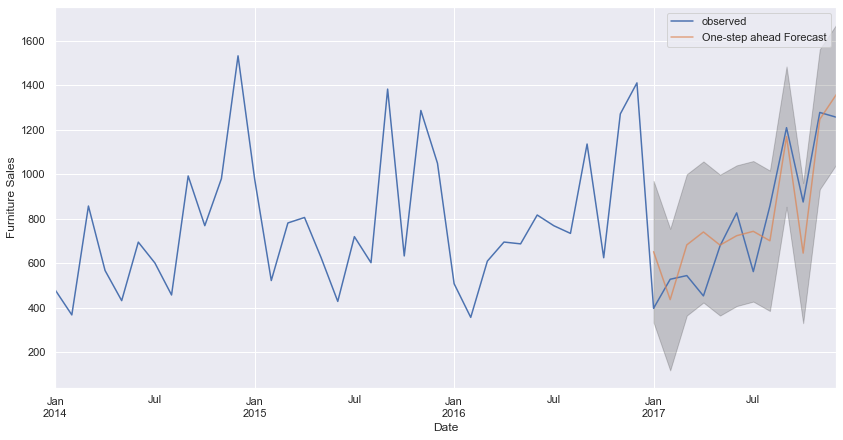

In [28]:
#set forecasts to start at 2017-01-01 to the end of the data to forecast
                                 


pred = results.get_prediction (start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
 plt.show()

#### The above plot indicates the observed value and the rolling forecast predications. The predicated values align well with the true values. Final Conclusion: We observe that sales of furniture produces seasonal pattern. Early of the year is the off season for furniture sales in the superstore. The sales for furniture increases linearly over time.
